# Unit Test for Leica Scan Processing
Run the below code and compare it to the expected results at the bottom.  This is not rigourous but better then nothing.

In [1]:
%matplotlib inline
from lassiAnalysis import processLeicaScanPair
fn1 = "data/27mar2019/Clean9.ptx"
fn2 = "data/27mar2019/Clean11.ptx"

Processing PTX file ...
ProcessNewPTXData with:  -6.0 50.0 -10.0 47.0
Picking 10000 random data points from a total of 12539831
Skipped 0 non-data lines
Skipped 0 non-data lines
Starting with 12539831 lines of data
Filtered out 3284344 points of 12539831 (26.19%) intensity equal to zero
Now we have 9255487 lines of data
neighborFilter reduces 9255487 points to 9207937 points (47550 filtered, 0.513749 %) using tol: 0.122000
Now we have 9207937 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.82, std= 0.05
radial limit filtered out 1026598 points outside radius 47.00
Now we have 8181339 lines of data
z - limit filtered out 0 points below -80.00
Rotating about Z by -10.00 degrees
Now we have 8181339 lines of data
Elapsed minutes:  2.35
Smoothing data ...
system cmd:  runGpuSmooth /users/psalas/LASSI/repo/gpu_smoothing psalas vegas-hpc10 /home/scratch/psalas/LASSI/lassi-analysis/data/27mar2019/Clean9.ptx.csv Clean9.ptx.csv 512 0.00100
GPUs created file:  /users/psalas/LASSI/repo/gpu_

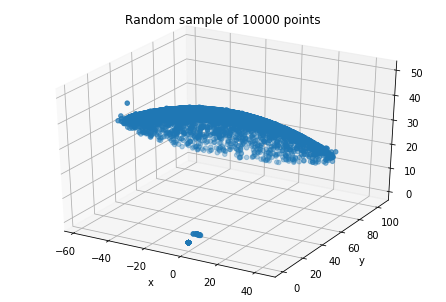

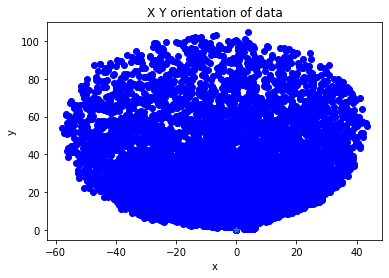

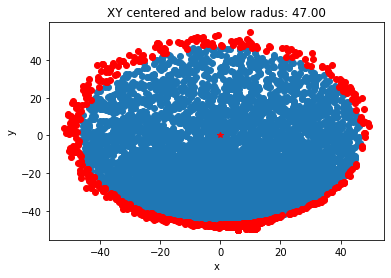

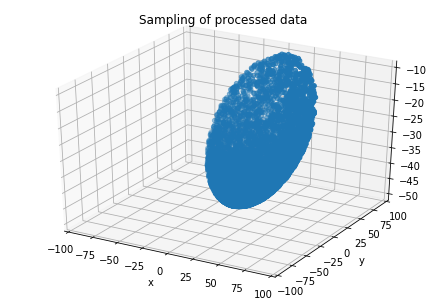

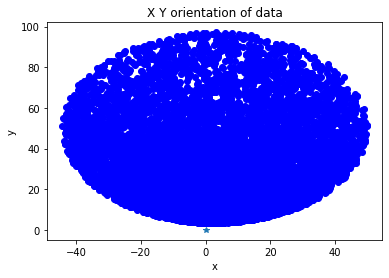

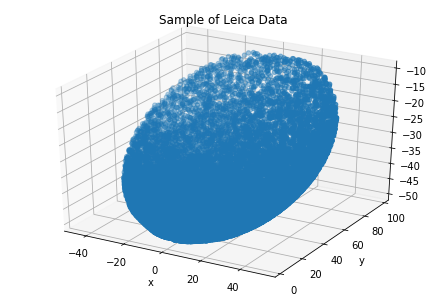

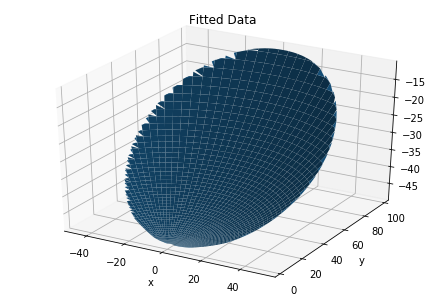

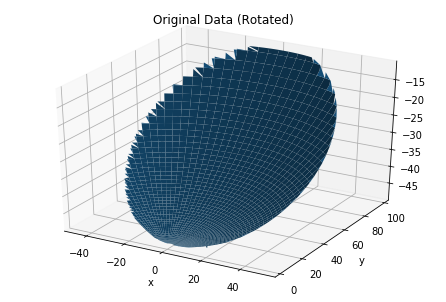

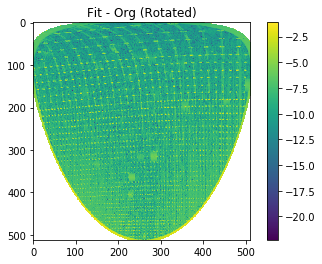

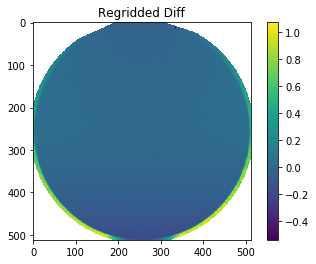

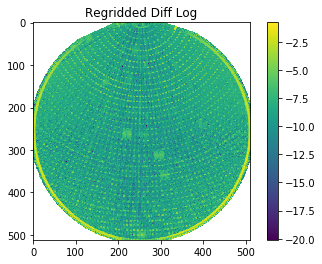

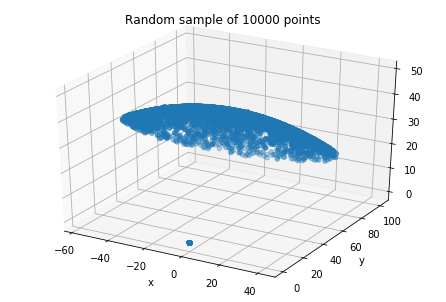

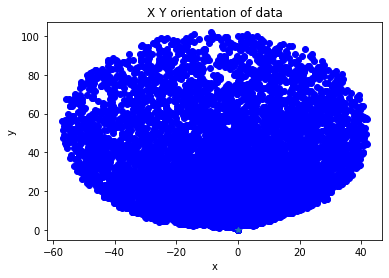

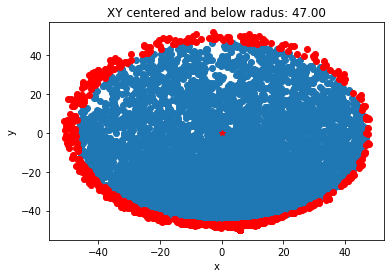

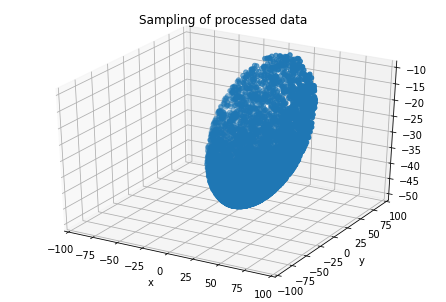

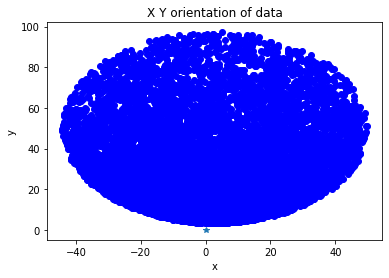

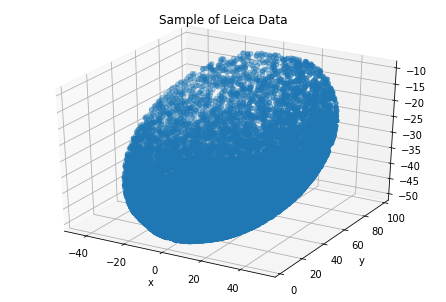

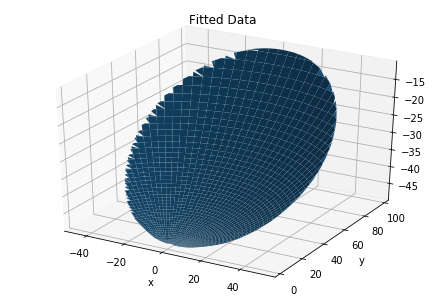

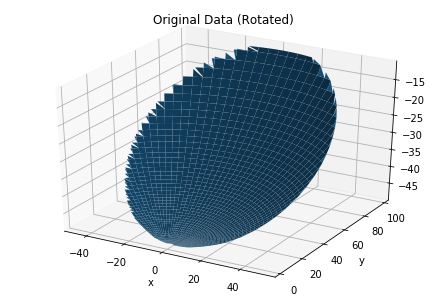

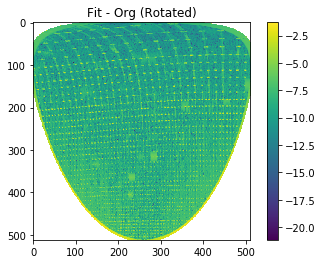

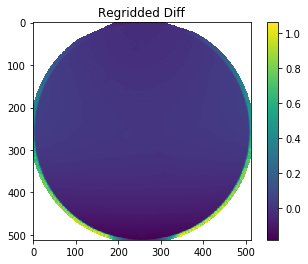

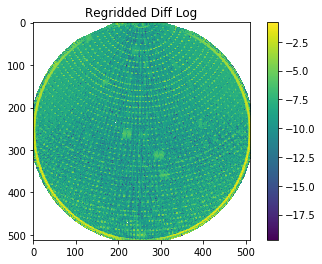

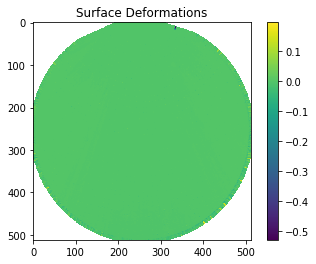

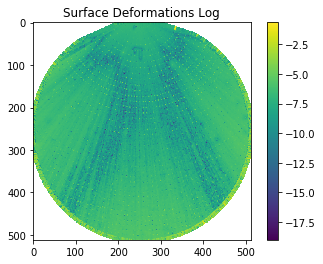

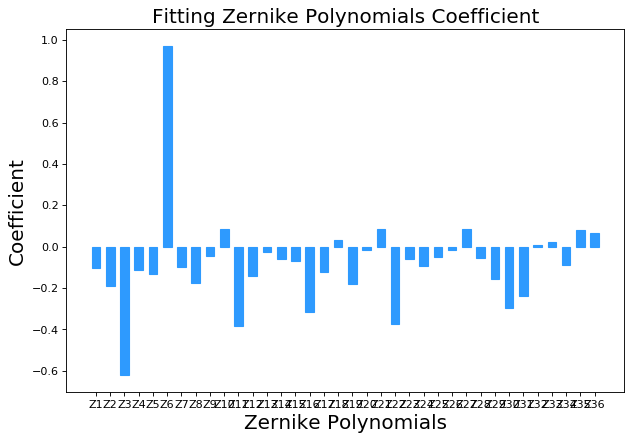

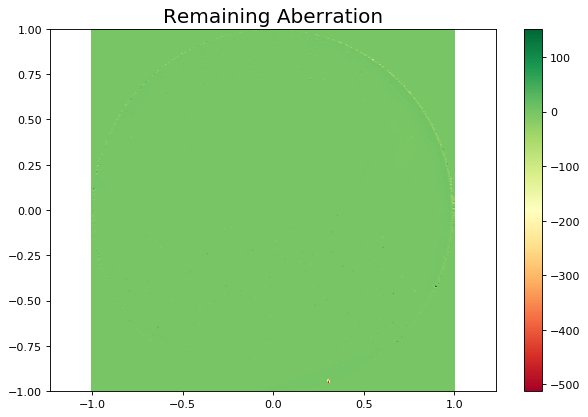

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-0.189 |-0.623 |-0.113 |-0.131 | 0.971 |-0.099 |-0.174 |-0.048 | 0.087 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.385 |-0.142 |-0.028 |-0.060 |-0.068 |-0.318 |-0.124 | 0.031 |-0.179 |-0.019 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.087 |

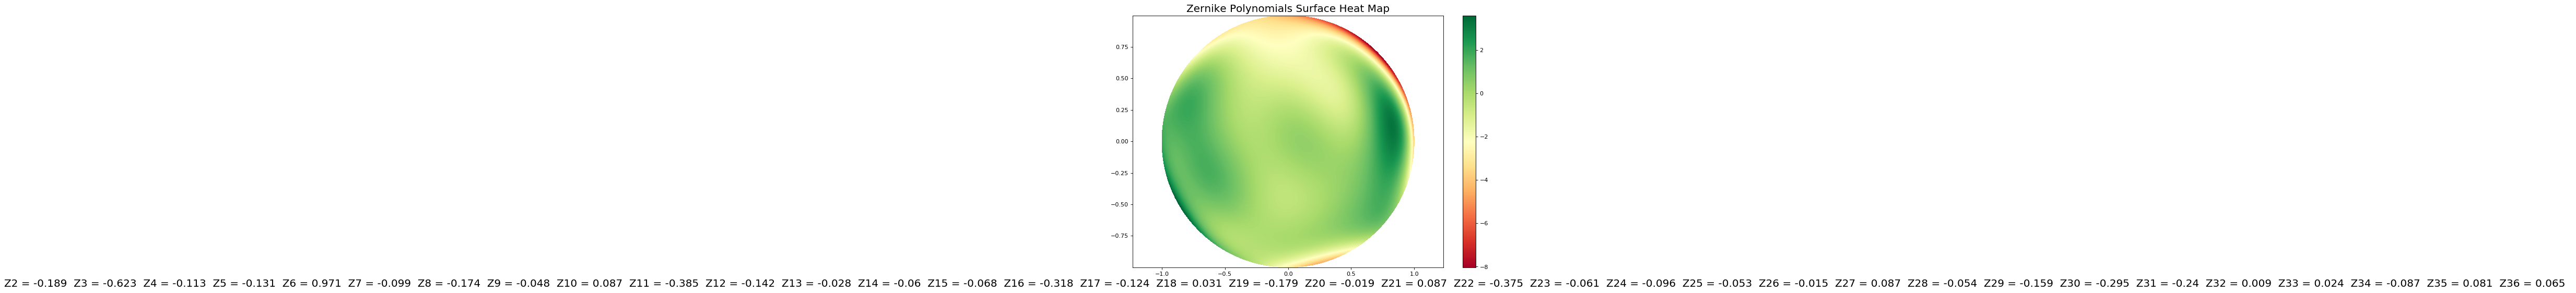

Converting from Noll to Active Surface ANSI Zernikies ...
nolZs
[0]
[-0.189, -0.623]
[-0.113, -0.131, 0.971]
[-0.099, -0.174, -0.048, 0.087]
[-0.385, -0.142, -0.028, -0.06, -0.068]
[-0.318, -0.124, 0.031, -0.179, -0.019, 0.087]
[-0.375, -0.061, -0.096, -0.053, -0.015, 0.087, -0.054]
[-0.159, -0.295, -0.24, 0.009, 0.024, -0.087, 0.081, 0.065]
active surface Zs
[0]
[-0.189, -0.623]
[0.971, -0.113, -0.131]
[0.087, -0.174, -0.099, -0.048]
[-0.06, -0.142, -0.385, -0.028, -0.068]
[-0.019, 0.031, -0.318, -0.124, -0.179, 0.087]
[0.087, -0.015, -0.096, -0.375, -0.061, -0.053, 0.087]
[0.065, -0.087, 0.009, -0.295, -0.159, -0.24, 0.024, 0.081]
CPU times: user 7min 3s, sys: 3min 6s, total: 10min 10s
Wall time: 27min 10s


In [2]:
%%time
r = processLeicaScanPair(fn1, fn2, rot=-10.)

Loading processed data from file: Clean9.ptx.processed.npz
Loading processed data from file: Clean11.ptx.processed.npz
Finding difference between scans ...
xs1 dims -44.979698181152344 50.50142288208008 2.760862350463867
ys1 dims 2.549656391143799 97.21206665039062 49.88086152076721
xs2 dims -44.983604431152344 50.52155303955078 2.7689743041992188
ys2 dims 2.549582004547119 97.21980285644531 49.884692430496216
Center (2.760862, 49.880862), Removing points close to edge: radius=45.500000
radialReplace replaced 74300 points with nan
Mean of diffs:  3.5794129441933026e-05
Std of diffs:  0.0014136940033821867
Fitting difference to zernikies ...


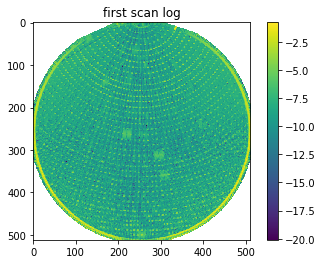

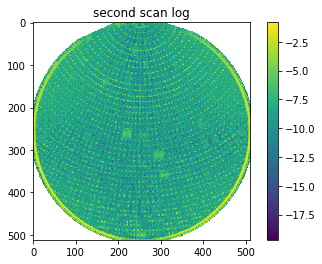

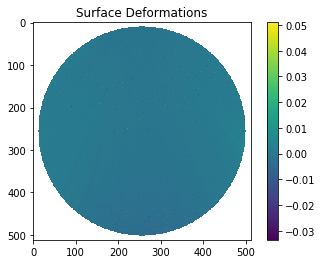

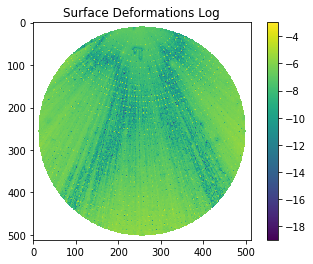

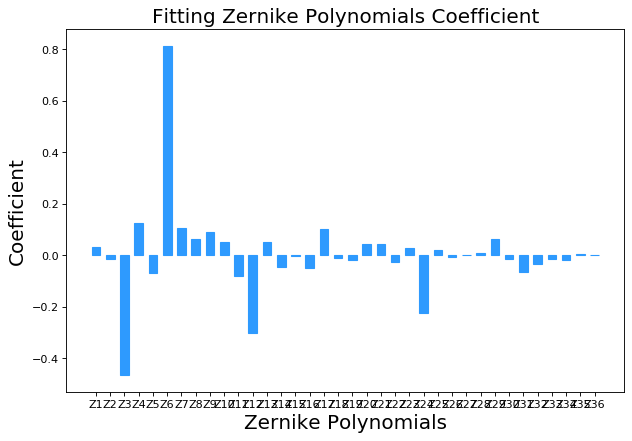

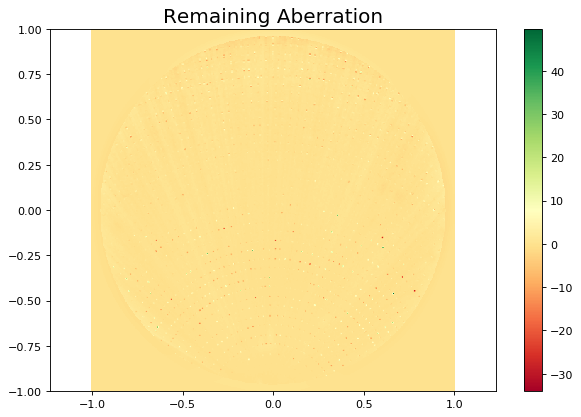

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-0.013 |-0.466 | 0.127 |-0.070 | 0.814 | 0.107 | 0.063 | 0.090 | 0.051 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.081 |-0.303 | 0.050 |-0.046 |-0.001 |-0.049 | 0.102 |-0.010 |-0.017 | 0.046 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.046 |

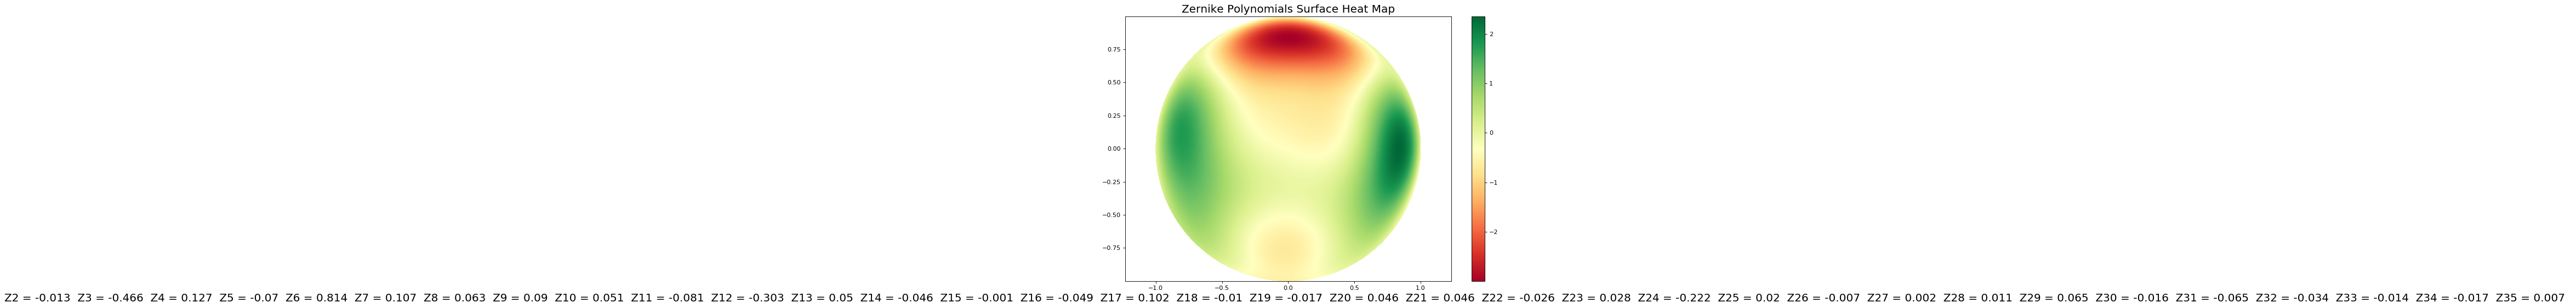

Converting from Noll to Active Surface ANSI Zernikies ...
nolZs
[0]
[-0.013, -0.466]
[0.127, -0.07, 0.814]
[0.107, 0.063, 0.09, 0.051]
[-0.081, -0.303, 0.05, -0.046, -0.001]
[-0.049, 0.102, -0.01, -0.017, 0.046, 0.046]
[-0.026, 0.028, -0.222, 0.02, -0.007, 0.002, 0.011]
[0.065, -0.016, -0.065, -0.034, -0.014, -0.017, 0.007, 0.0]
active surface Zs
[0]
[-0.013, -0.466]
[0.814, 0.127, -0.07]
[0.051, 0.063, 0.107, 0.09]
[-0.046, -0.303, -0.081, 0.05, -0.001]
[0.046, -0.01, -0.049, 0.102, -0.017, 0.046]
[0.002, -0.007, -0.222, -0.026, 0.028, 0.02, 0.002]
[0.0, -0.017, -0.034, -0.016, 0.065, -0.065, -0.014, 0.007]


In [3]:
# compare the two scans we processed above again, this time applying
# a radial filter to take out the edge effects
from lassiAnalysis import processLeicaScanPair
r = processLeicaScanPair(fn1, fn2, rFilter=True, processed=True)

## Compare to expected results
Here's what we got back in June 2019:
![surface](docs/scan9vs11-Z4-surface.png)
![zernikes](docs/scan9vs11-Z4-zernikes.png)